# Project: Major League Baseball
## Enock Gansou, Subhee Rawal 

## A bit of background

We'll be looking at data about teams in Major League Baseball. A couple of important points:

Major League Baseball is a professional baseball league, where teams pay players to play baseball. The goal of each team is to win as many games out of a 162 game season as possible. Teams win games by scoring more runs than their adversary. In principle, better players are costlier, so teams that want good players need to spend more money. Teams that spend the most, frequently win the most. So, the question is, how can a team that can't spend so much win? The basic idea that Oakland (and other teams) used is to redefine what makes a player good, i.e., figure out what player characteristics translated into wins. Once they realized that teams were not really pricing players using these characteristics, they could exploit this to pay for undervalued players, players that were good according to their metrics, but were not recognized as such by other teams, and therefore not as expensive.

We can get more information about this period in baseball history from:

[Wikipedia](http://en.wikipedia.org/wiki/Moneyball)

[The Moneyball book](http://www.amazon.com/Moneyball-The-Winning-Unfair-Game/dp/0393324818)

[The Moneyball movie](http://www.imdb.com/title/tt1210166/)

## The Data

We will be using data from a very useful database on baseball teams, players and seasons curated by Sean Lahman available at [http://www.seanlahman.com/baseball-archive/statistics/](http://www.seanlahman.com/baseball-archive/statistics/). The database has been made available as a `sqlite` database [https://github.com/jknecht/baseball-archive-sqlite](https://github.com/jknecht/baseball-archive-sqlite).

You can read more about the dataset here: [http://seanlahman.com/files/database/readme2014.txt](http://seanlahman.com/files/database/readme2014.txt).

You can download the `sqlite` file directly from github at [https://github.com/jknecht/baseball-archive-sqlite/raw/master/lahman2014.sqlite](https://github.com/jknecht/baseball-archive-sqlite/raw/master/lahman2014.sqlite).

We will be accessing the `sqlite` database in python using the [sqlite package](https://docs.python.org/2/library/sqlite3.html). This package provides a straightforward interface to extract data from `sqlite` databases using standard SQL commands.


## The Question

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. We will see how this is reflected in the data we have.


In [3]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("ggplot")

### Part 1: Wrangling 
### Problem 1

In [4]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

Extract from salaries file information about team IDs, year IDs and the sum of salaries as total payroll,
then group the extracted data by year and team and order by team

In [5]:
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID ORDER BY teamID"
team_salaries = pd.read_sql(salary_query, conn)

Extract from teams file information about team IDs, year IDs, wins, games, and compute win rate,
then group the extracted data by year and team and order by team

In [6]:
winning_query = "SELECT teamID, yearID, W, G, 100*CAST(W AS float)/G AS win_rate, franchID FROM Teams GROUP BY yearID, teamID ORDER BY teamID"
w = pd.read_sql(winning_query, conn)

Inner join these two tables to combine all information about each team and every year, also get rid of any missing data.

In [7]:
salary_wins = team_salaries.merge(w, how ="inner",left_on=["yearID", "teamID"],right_on=["yearID", "teamID"])
salary_wins

,teamID,yearID,total_payroll,W,G,win_rate,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
5,ANA,2002,61721667.0,99,162,61.111111,ANA
6,ANA,2003,79031667.0,77,162,47.530864,ANA
7,ANA,2004,100534667.0,92,162,56.790123,ANA
8,ARI,1998,32347000.0,65,162,40.123457,ARI
9,ARI,1999,68703999.0,100,162,61.728395,ARI


### Part 2: Exploratory Data Analysis
### Problem 2 
Writing code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014).

In [8]:
s_new = salary_wins[salary_wins.yearID > 1989]
s_new = s_new[s_new.yearID < 2015]
s_new = s_new.pivot(index ='teamID', columns='yearID', values='total_payroll')

###### The plot will be of kind bar where  payroll per team are stacked on each other according to the year

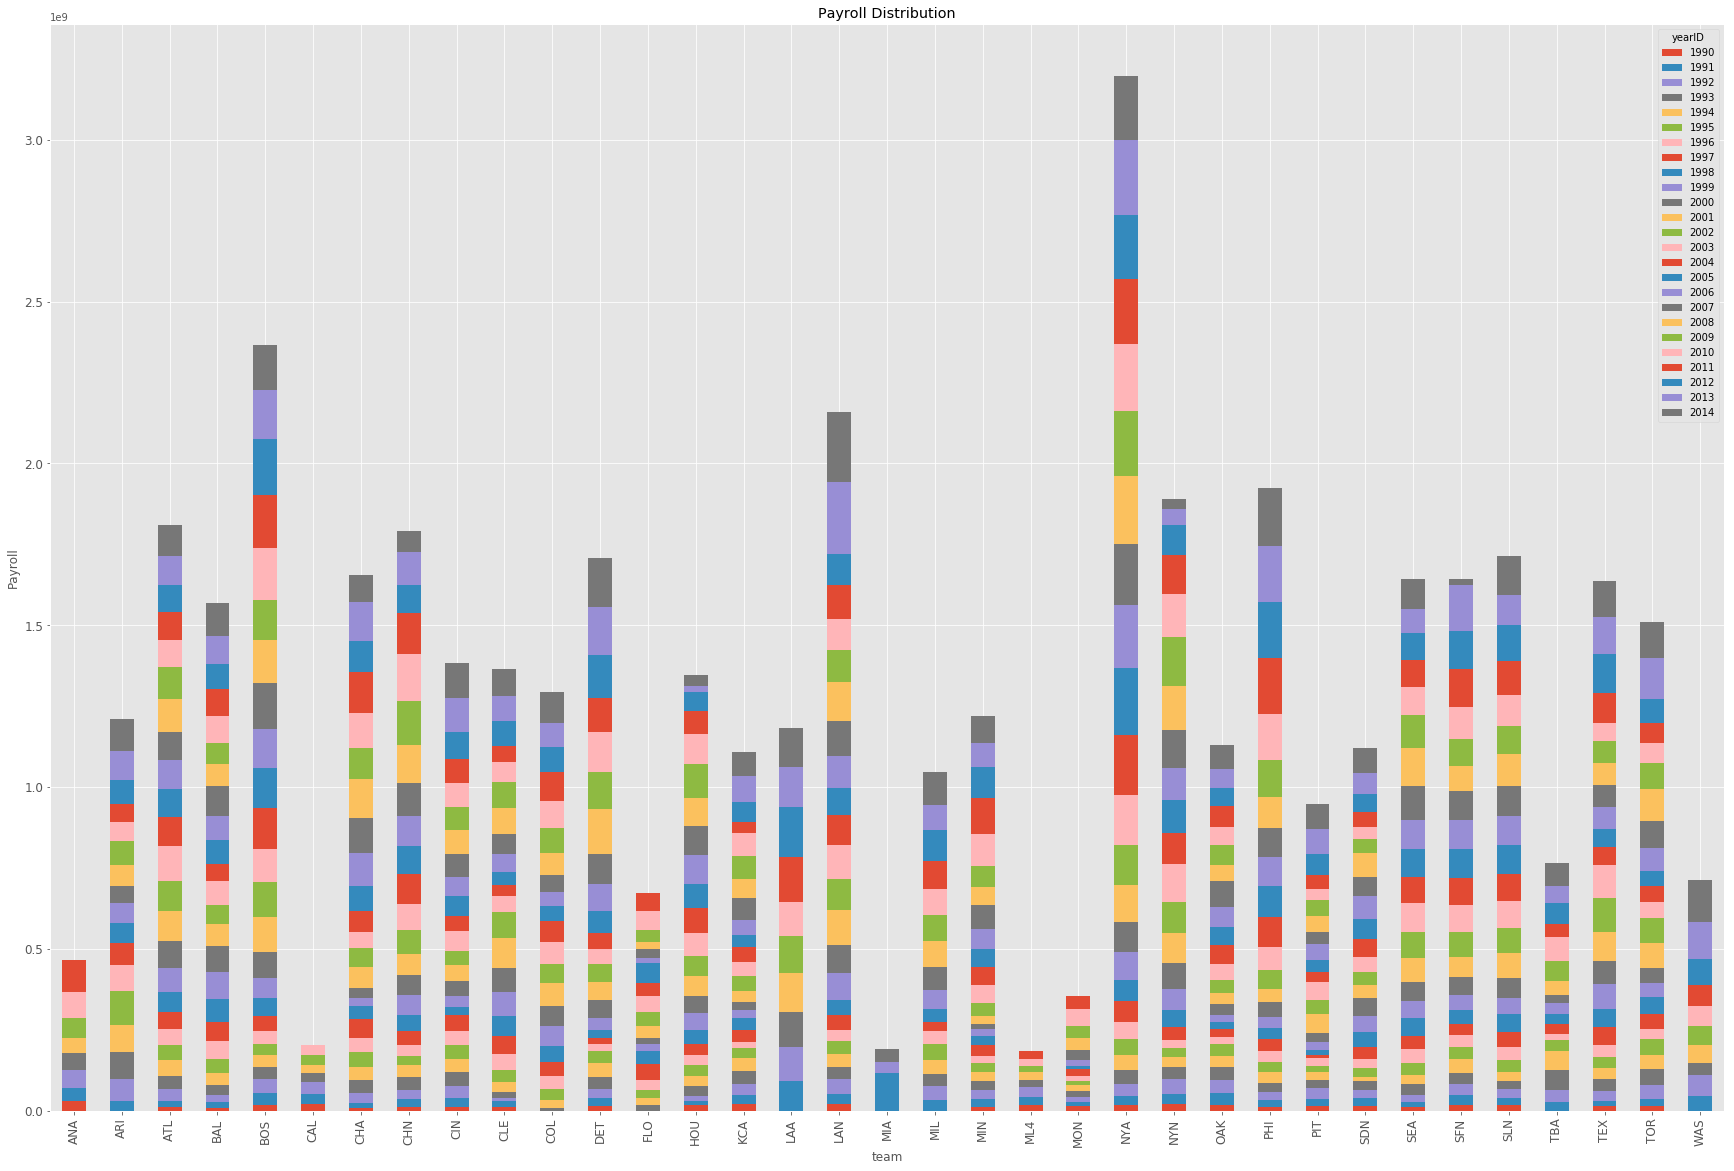

In [9]:
s_new.plot(kind = 'bar',title ="Payroll Distribution", stacked = True, figsize=(30, 20), legend=True, fontsize=12)
plt.xlabel("team")
plt.ylabel("Payroll")
plt.show()

 By looking at the plot , we can see there is a general increase over time for total payroll for each team.
 We can then say that the central tendency and the mean of the payroll might be increasing over time.

### Problem 3
Writing code to produce plots that specifically show at least one of the statements you made in Question 1.

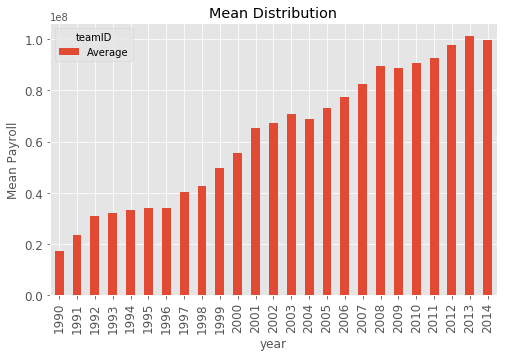

In [10]:
# Compute mean and standard deviation for each year combining all teams 
a = s_new.mean()
b = s_new.std()
s_new.loc['Average'] = a
s_new.loc['StandardDev'] = b
# Plot mean calculated above for every year
s_mean = s_new.drop(s_new.index[range(0,35)])
s_mean = s_mean.drop(s_mean.index[range(1,2)])
s_mean = s_mean.transpose()
s_mean.plot(kind = 'bar',title ="Mean Distribution", figsize=(8, 5), legend=True, fontsize=12)
plt.xlabel("year")
plt.ylabel("Mean Payroll")
plt.show()

As observed in question 1, we see that the mean payroll of all teams are likely to increase over the years.

### Problem 4 
Correlation between payroll and winning percentage

In [11]:
# Discretize year into five time periods
bins = [1990,1995,2000,2005,2010,2015]
group_names=['period_1','period_2','period_3','period_4','period_5']
salary_wins['period'] = pd.cut(salary_wins['yearID'],bins,right=False, labels=group_names)
salary_wins

,teamID,yearID,total_payroll,W,G,win_rate,franchID,period
0,ANA,1997,31135472.0,84,162,51.851852,ANA,period_2
1,ANA,1998,41281000.0,85,162,52.469136,ANA,period_2
2,ANA,1999,55388166.0,70,162,43.209877,ANA,period_2
3,ANA,2000,51464167.0,82,162,50.617284,ANA,period_3
4,ANA,2001,47535167.0,75,162,46.296296,ANA,period_3
5,ANA,2002,61721667.0,99,162,61.111111,ANA,period_3
6,ANA,2003,79031667.0,77,162,47.530864,ANA,period_3
7,ANA,2004,100534667.0,92,162,56.790123,ANA,period_3
8,ARI,1998,32347000.0,65,162,40.123457,ARI,period_2
9,ARI,1999,68703999.0,100,162,61.728395,ARI,period_2


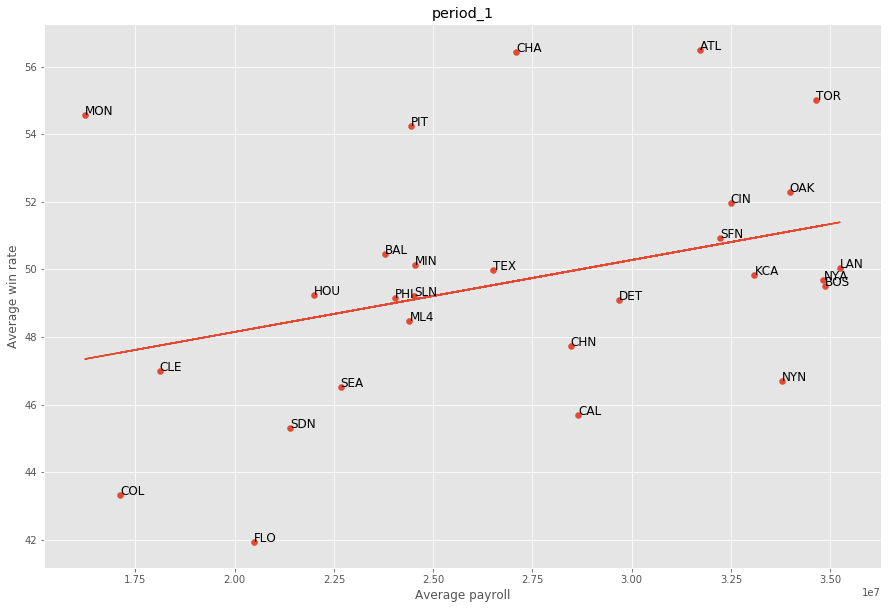

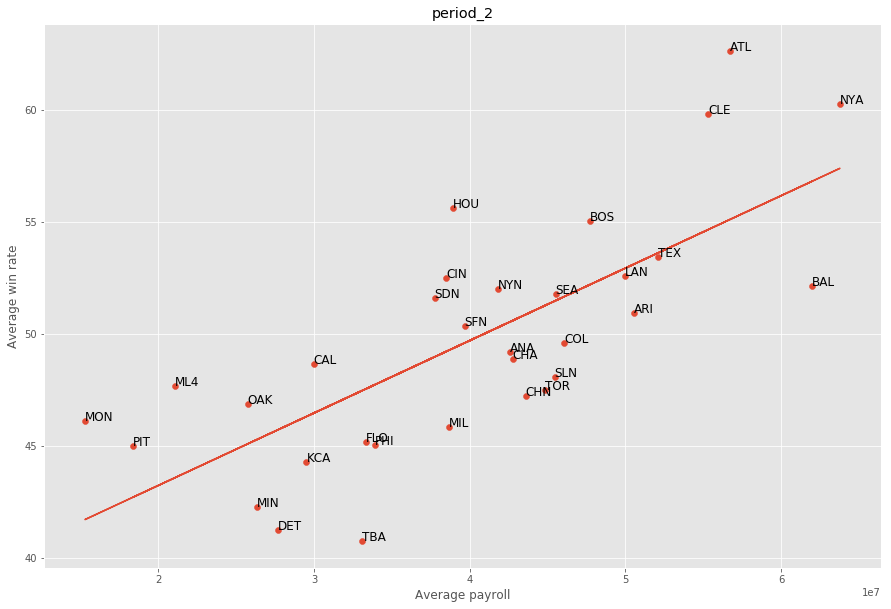

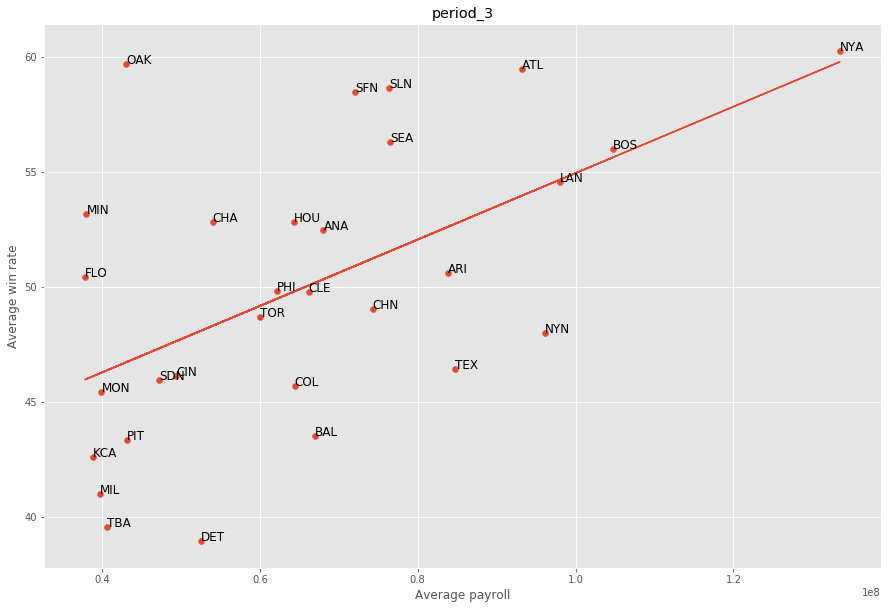

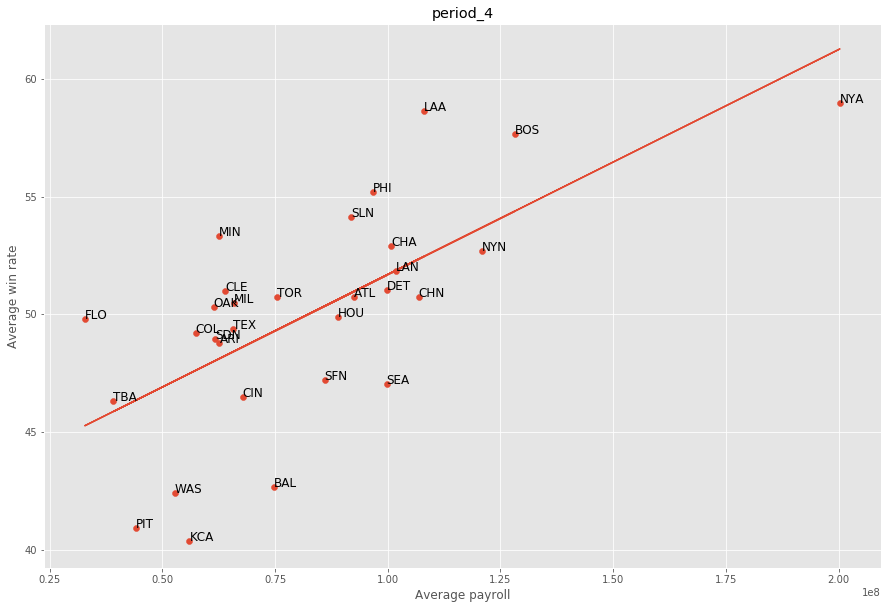

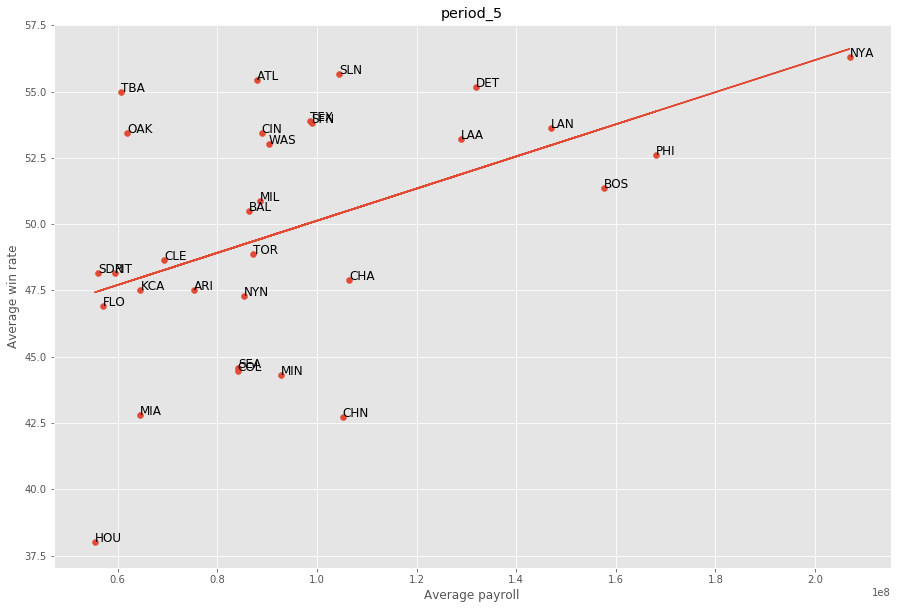

In [12]:
# Making a scatterplot showing mean winning percentage (y-axis) vs. 
# mean payroll (x-axis) for each of the five time periods.
for period in group_names:
    # Computing average total payroll and win rate for each team per period
    s = salary_wins[salary_wins.period  == period]
    a = s.pivot(index='yearID', columns='teamID', values='total_payroll')
    b = s.pivot(index='yearID', columns='teamID', values='win_rate')
    x_data = a.mean().values
    y_data = b.mean().values
    # Making a scatter plot and drawing a regression line 
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    a = a.transpose()
    # annotate each point with its team name.
    for i, txt in enumerate(a.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Average payroll")
    plt.ylabel("Average win rate")
    plt.title(period)
    plt.show()

### Observations:
Statement 1: The average payroll is increasing accross these period (the unit of x-axis change from 10^7 to 10^8)<br>
Statement 2: Using the interpolation line,we observe that the higher the payroll is, the higher the win_rate is. Therefore, if teams are  above the interpolation line, they have a relatively higher efficiency on using their money in that period<br>
Statement 3: The team NYA is always at the upper-right corner(except period 1), so basically, this team use the strategy that paying more and gain a higher win_rate.<br>
Statement 4: ATL did pretty good on using money efficiently. The point is always above the interpolation line with a large scale (except period_4)<br>
Statmenet 5: OAK is always locate at the left half of the graph (except period_1), which means it spent less money. But, it always locate above the interpolation line with large scale. Especially in period_3, OAK's payroll was one of the least, but its win_rate is one of the highest, which means OKA's spending efficiency at that time period is very high!!!<br>

### Part 3: Data transformations
### Problem 5: 
Creating a new variable in your dataset that standardizes payroll conditioned on year. For each team and their corresponding year, find the corresponding the average payroll for each year, and the standard deviation of payroll for each year

In [13]:
list1 = []
list2 = []
for i, row in salary_wins.iterrows():
    a = 0
    for year in s_new:
        if (year == (row['yearID'])):
            list1.append(s_new[year].Average)
            list2.append(s_new[year].StandardDev)
            a = a + 1
    if (a == 0):
        list1.append(np.NaN)
        list2.append(np.NaN)
# Adding information to the table 
averages = pd.DataFrame(list1, columns = ['raw'])
salary_wins['average'] = averages           
stddevs = pd.DataFrame(list2, columns = ['raw'])
salary_wins['standardDev'] = stddevs
# Adding a new column computing the standard payroll of each team and their corresponding year
salary_wins['std_payroll'] = (salary_wins['total_payroll']-salary_wins['average'])/ (salary_wins['standardDev'])
salary_wins

,teamID,yearID,total_payroll,W,G,win_rate,franchID,period,average,standardDev,std_payroll
0,ANA,1997,31135472.0,84,162,51.851852,ANA,period_2,4.026021e+07,1.306073e+07,-0.698639
1,ANA,1998,41281000.0,85,162,52.469136,ANA,period_2,4.260943e+07,1.538081e+07,-0.086369
2,ANA,1999,55388166.0,70,162,43.209877,ANA,period_2,4.980762e+07,2.056133e+07,0.271410
3,ANA,2000,51464167.0,82,162,50.617284,ANA,period_3,5.553784e+07,2.141622e+07,-0.190214
4,ANA,2001,47535167.0,75,162,46.296296,ANA,period_3,6.535544e+07,2.470771e+07,-0.721244
5,ANA,2002,61721667.0,99,162,61.111111,ANA,period_3,6.746925e+07,2.469219e+07,-0.232769
6,ANA,2003,79031667.0,77,162,47.530864,ANA,period_3,7.094207e+07,2.801196e+07,0.288791
7,ANA,2004,100534667.0,92,162,56.790123,ANA,period_3,6.902220e+07,3.282411e+07,0.960040
8,ARI,1998,32347000.0,65,162,40.123457,ARI,period_2,4.260943e+07,1.538081e+07,-0.667223
9,ARI,1999,68703999.0,100,162,61.728395,ARI,period_2,4.980762e+07,2.056133e+07,0.919025


### Problem 6: 
Repeating the same plots as Problem 4, but using this new standardized payroll variable. Making a scatterplot showing mean winning percentage (y-axis) vs. mean standardized payroll (x-axis) for each of the five time periods.

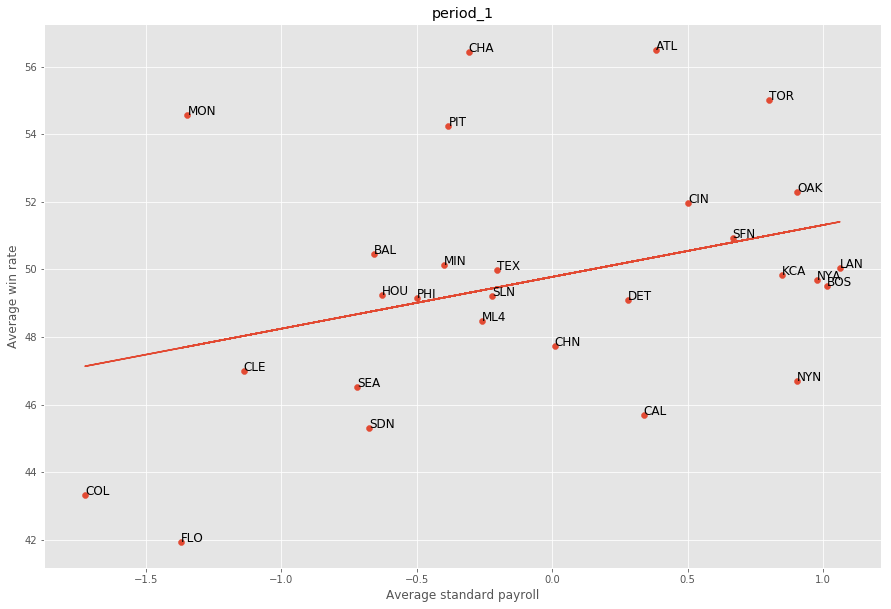

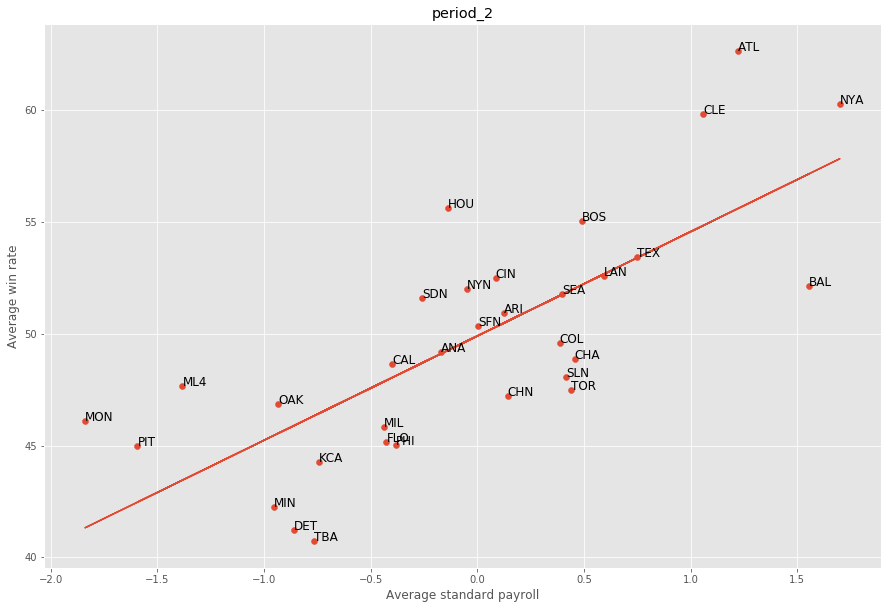

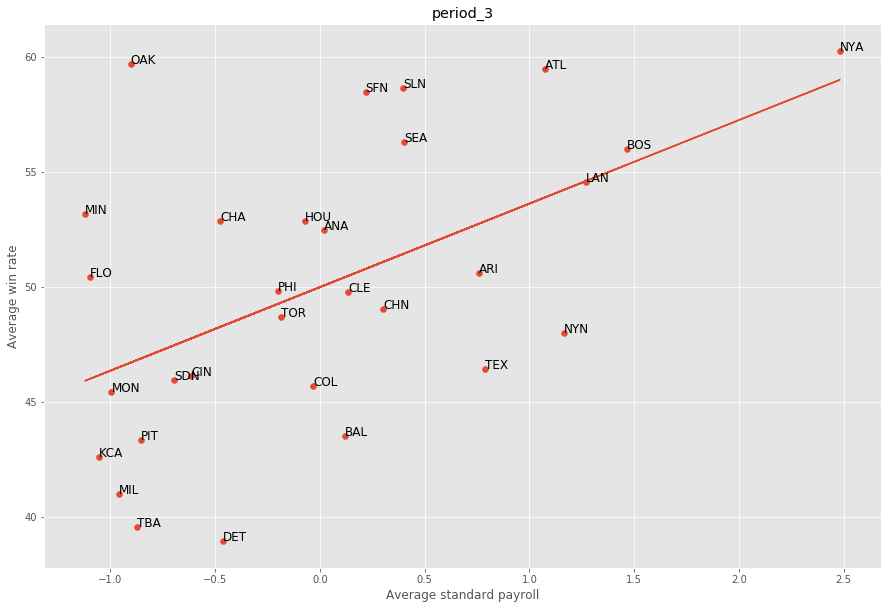

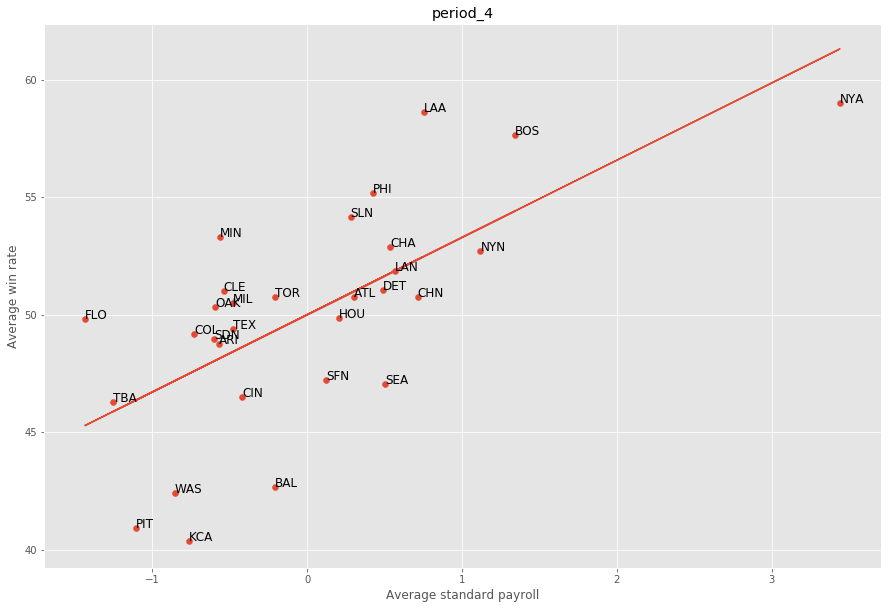

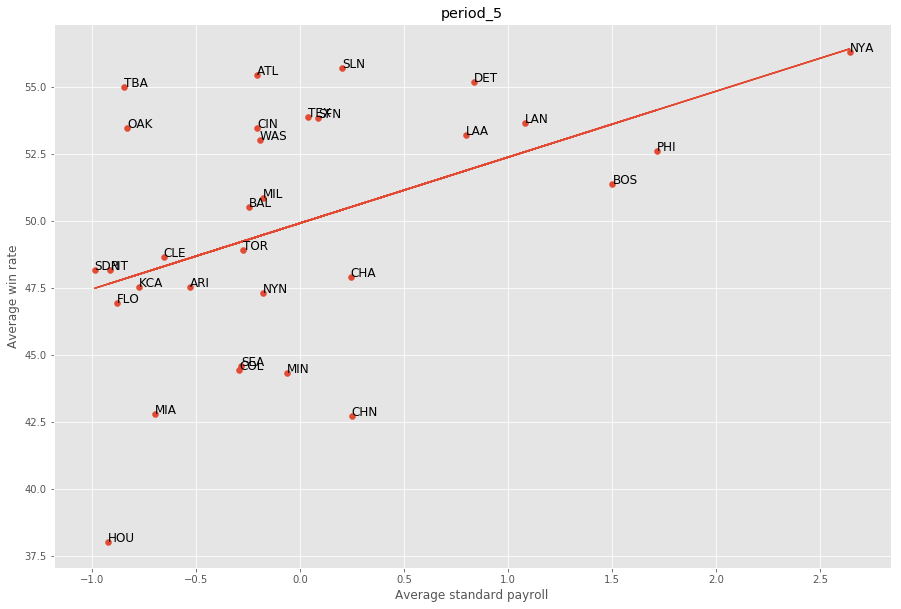

In [14]:
for period in group_names:
    # Computing average standardized payroll and win rate for each team per period
    s = salary_wins[salary_wins.period  == period]
    a = s.pivot(index='yearID', columns='teamID', values='std_payroll')
    b = s.pivot(index='yearID', columns='teamID', values='win_rate')
    x_data = a.mean().values
    y_data = b.mean().values
    # Making a scatter plot and drawing a regression line
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    a = a.transpose()
    # annotate each point with its team name.
    for i, txt in enumerate(a.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Average standard payroll")
    plt.ylabel("Average win rate")
    plt.title(period)
    plt.show()

### Observataions: 
We observe the shape of the plots in Probelm 6 are almost the same with the polts in Problem 4 even though the unit and the range of X-coordinate changed here. Standardization shows which data is near the mean point directly. And we can know with straight forward sense that in what degree is a data away from the mean.

### Problem 7 : 
Making a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). In this case, we will just consider the whole period (from 1990 to 2015). Adding a regression line to highlight the relationship.

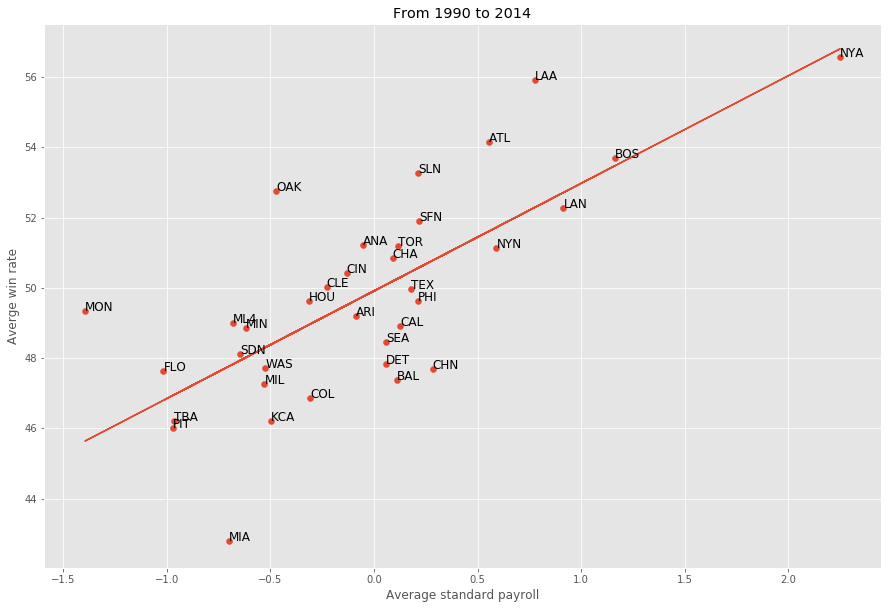

In [15]:
# Computing average total payroll and win rate for each team
a = salary_wins.pivot(index='yearID', columns='teamID', values='std_payroll')
b = salary_wins.pivot(index='yearID', columns='teamID', values='win_rate')
x_data = a.mean().values
y_data = b.mean().values
# Making a scatter plot and drawing a regression line
fit = np.polyfit(x = x_data,y = y_data,deg = 1)
plt.figure(figsize = (15,10))
plt.plot(x_data, fit[0] * x_data + fit[1])
plt.scatter(x_data, y_data)
a = a.transpose()
# annotate each point with its team name.
for i, txt in enumerate(a.index):
    plt.annotate(txt, (x_data[i],y_data[i]),size=12)
plt.xlabel("Average standard payroll")
plt.ylabel("Averge win rate")
plt.title("From 1990 to 2014")
plt.show()

In [16]:
# Adding to the table a new column after computing  the expected win percentage with given formula
salary_wins['expected_win_pct'] = 50 + 2.5*salary_wins['std_payroll']
salary_wins

,teamID,yearID,total_payroll,W,G,win_rate,franchID,period,average,standardDev,std_payroll,expected_win_pct
0,ANA,1997,31135472.0,84,162,51.851852,ANA,period_2,4.026021e+07,1.306073e+07,-0.698639,48.253402
1,ANA,1998,41281000.0,85,162,52.469136,ANA,period_2,4.260943e+07,1.538081e+07,-0.086369,49.784077
2,ANA,1999,55388166.0,70,162,43.209877,ANA,period_2,4.980762e+07,2.056133e+07,0.271410,50.678524
3,ANA,2000,51464167.0,82,162,50.617284,ANA,period_3,5.553784e+07,2.141622e+07,-0.190214,49.524464
4,ANA,2001,47535167.0,75,162,46.296296,ANA,period_3,6.535544e+07,2.470771e+07,-0.721244,48.196891
5,ANA,2002,61721667.0,99,162,61.111111,ANA,period_3,6.746925e+07,2.469219e+07,-0.232769,49.418077
6,ANA,2003,79031667.0,77,162,47.530864,ANA,period_3,7.094207e+07,2.801196e+07,0.288791,50.721977
7,ANA,2004,100534667.0,92,162,56.790123,ANA,period_3,6.902220e+07,3.282411e+07,0.960040,52.400100
8,ARI,1998,32347000.0,65,162,40.123457,ARI,period_2,4.260943e+07,1.538081e+07,-0.667223,48.331943
9,ARI,1999,68703999.0,100,162,61.728395,ARI,period_2,4.980762e+07,2.056133e+07,0.919025,52.297562


### Problem 8 : 
Creating a new column to compute each team's spending effiency

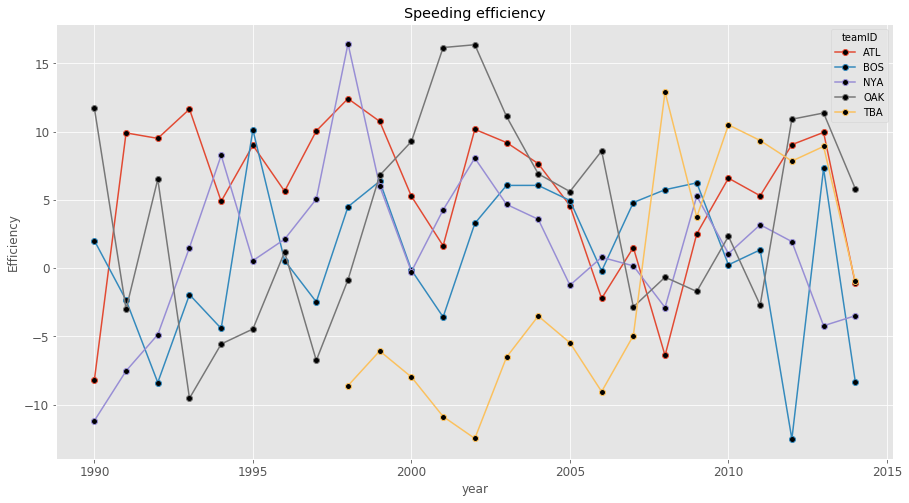

In [17]:
salary_wins['efficiency'] = salary_wins['win_rate'] - salary_wins['expected_win_pct']

# Get efficiency data within the specified range
s_efficiency = salary_wins[salary_wins.yearID > 1989]
s_efficiency = s_efficiency[s_efficiency.yearID < 2015]
# Get efficiency data for each of the suggested teams
s1 = s_efficiency[s_efficiency.teamID == 'BOS' ]
s2 = s_efficiency[s_efficiency.teamID == 'OAK' ]
s3 = s_efficiency[s_efficiency.teamID == 'NYA' ]
s4 = s_efficiency[s_efficiency.teamID == 'ATL' ]
s5 = s_efficiency[s_efficiency.teamID == 'TBA' ]
# Combing all teams efficiency
frames = [s1,s2,s3,s4,s5]
s_efficiency = pd.concat(frames)

# Making line plot with year on the x-axis and efficiency on the y-axis. 
# Plotting suggested teams ( OAK, BOS, NYA, ATL, TBA).
s_efficiency = s_efficiency.pivot(index='yearID', columns='teamID', values='efficiency')
s_efficiency.plot(kind = 'line',title ="Speeding efficiency", markevery = 1, marker='o', markerfacecolor='black', figsize=(15, 8), legend=True, fontsize=12)
plt.xlabel("year")
plt.ylabel("Efficiency")
plt.show()

### Observation: 
This plot gives us the information of spending_effficency with more details. As I observed in Question 2, ATL, NYA, OKA, all have a large part of time with positive spending_efficiency. OKA done pretty well in the period 2000-2004, which is period_3, as claimed in Question 2. What we didn't observe in Question 2 and 3 are some of the sudden spending_efficiency changes in a small period, such as NYA's great spending_effiency in 1998.